# LMS Adaptive Canceller demonstration

Import the necessary packages

In [27]:
import numpy as np
import matplotlib.pylab as plt

Set the total length N of the time series and the period of our signal T

In [28]:
# creation of data
N = 2000
T = 40

Generate the clean signal,x, the random noise, the input to the filter algorithm (signal plus noise) and the reference for the adaptive filter (initially just the noise)

In [29]:
x = np.sin( 2 * np.pi * np.arange(0,N) /T) # input matrix
noise = 2.0 * (np.random.rand(N) - 0.5)
filtin = x + noise
filtref = noise 

Set the length of the adaptive filter, flength, the step size mu, initialize the weight w to zero and make arrays for the output and the evolution of weights.

In [30]:
flength = 10 
mu = 0.01 # step size/ adaptation rate --> critial parameter
# the smaller adaptation rate the longer it takes to improve signal
# but too large step size (e.g. 0.1): large spike/ amplitude 
# --> large changes in weights due to large step size (resonance effect)
# 0.05

w = np.zeros(flength)
out = np.zeros(N)
clean = np.zeros(N)
whist = np.zeros([flength,N])

The core LMS adaptive filter algorithm.
- Copy filterlength values from the input time series
- Calculate the filter output with the current weight
- We associate the filter output with the middle of the corresponding noise section
- Calculate the discrepancy between the reference and the filter output
- Adapt weights
- Store weights and output for plotting
- Calculate the clean signal, the difference between the input and filter output

In [31]:
# each bullet point above corresponds to line line below
for i in range(flength,N):
    currin = filtin[i-flength:i] # filter takes 10 input samples
    foutput = np.sum(w * currin) # weights are initially 0, so output will be zero as well first
    refpoint = i - int(flength/2) # associate noise with certain part of real signal
    epsilon = filtref[refpoint] - foutput # slight delay
    w = w + 2.0 * mu * epsilon * currin # adapt the weights
    whist[:,refpoint] = w # only for plotting
    out[refpoint] = foutput # store output
    clean[refpoint] = currin[int(flength/2)] - foutput

Plot the noisy input, the cleaned up signal compared to the true signal, the true noise and the filter output and the evolution of weights

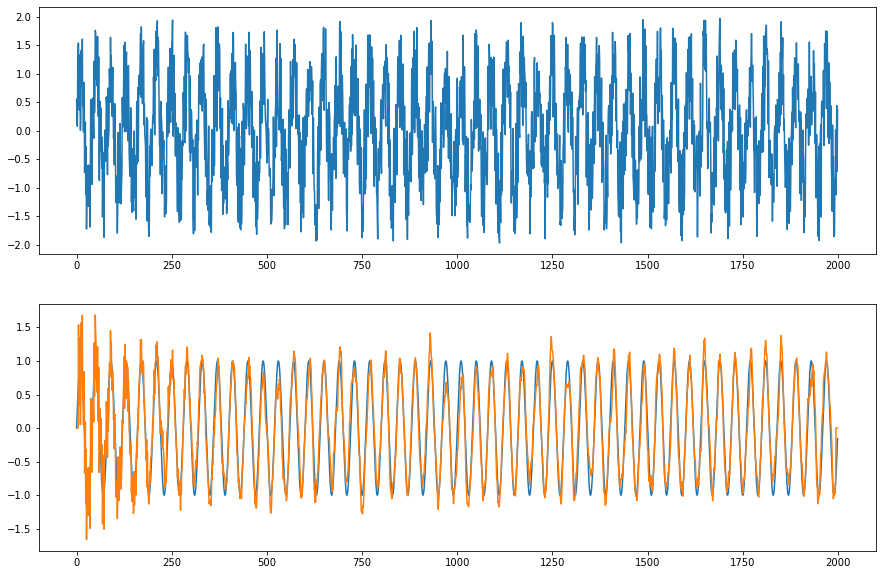

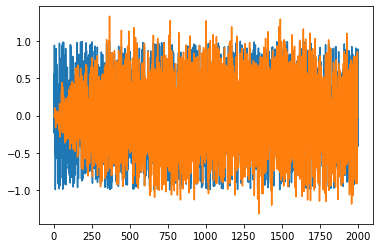

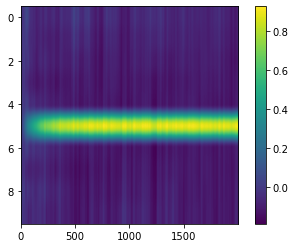

In [32]:
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(filtin)
plt.subplot(212)
plt.plot(x)
#plt.ylim(-10,10)
plt.plot(clean)
plt.show()

plt.figure()
plt.plot(noise)
plt.plot(out)

plt.figure()
a = plt.imshow(whist,aspect=N/flength)
plt.colorbar(a)

## Tasks
- Vary the adaptation rate between 0.001 and 0.1 What do you observe?
- How do you interpret the evolution of weights plot in the successfull runs? What does it tell us about the nature of the noise?

## Tasks part 2
- Implement the stepsize normalization of the NLMS algorithm.
- Vaty the adaptation rate. Do you see a similar sensitivity as for the LMS algorithm?
- Add noise with zero mean to the filter reference, i.e. the filter does not get the true noise any more. How does this affect the performance of the filter? 